<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/5_Forecasting%20%7C%20ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/final.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
features = ['% Silica Feed', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       '% Iron Concentrate']

label = '% Silica Concentrate'

timesteps = 25
train_df, test_df = df[0:-timesteps], df[-timesteps:]

X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [24]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=300, learning_rate=0.01, objective ='reg:linear', verbosity = 0)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
test_df['xgboost_predictions'] = pd.Series(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Test RMSE: 0.774


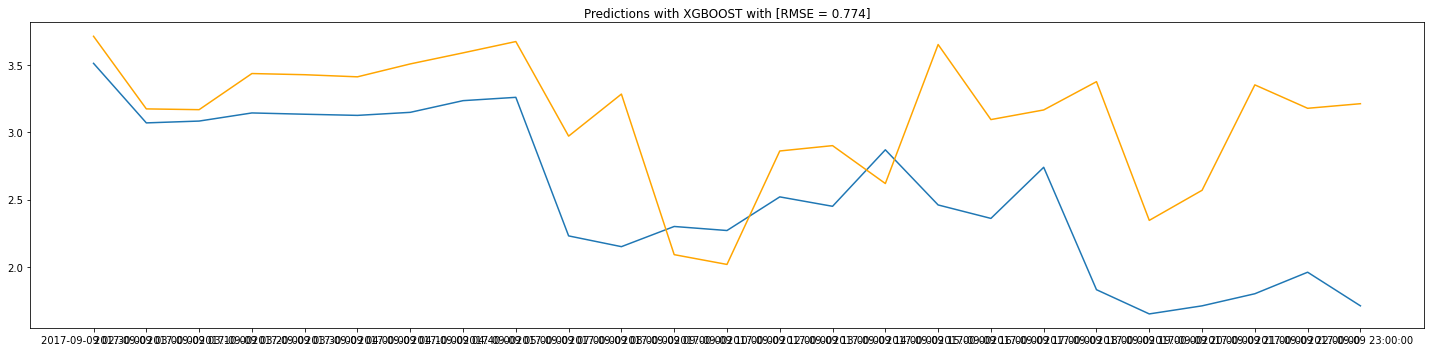

In [38]:
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(20,5))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_df['% Silica Concentrate'], predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test_df['dates'], test_df['% Silica Concentrate'])
pyplot.plot(test_df['dates'], predictions, color='orange')
plt.title("Predictions with XGBOOST with [RMSE = %.3f]" % rmse)

pyplot.tight_layout();
pyplot.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
test_df = test_df.reset_index().drop('index', axis=1)
test_df['randomeForest_predictions'] = pd.Series(predictions)

In [40]:
df[["dates"]] = df[["dates"]].apply(pd.to_datetime)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dates                         3805 non-null   datetime64[ns]
 1   % Silica Feed                 3805 non-null   float64       
 2   Amina Flow                    3805 non-null   float64       
 3   Flotation Column 01 Air Flow  3805 non-null   float64       
 4   Flotation Column 03 Air Flow  3805 non-null   float64       
 5   Flotation Column 04 Air Flow  3805 non-null   float64       
 6   Flotation Column 02 Level     3805 non-null   float64       
 7   Flotation Column 03 Level     3805 non-null   float64       
 8   % Iron Concentrate            3805 non-null   float64       
 9   % Silica Concentrate          3805 non-null   float64       
 10  Purity                        3805 non-null   int64         
dtypes: datetime64[ns](1), float64(

Test RMSE: 0.774


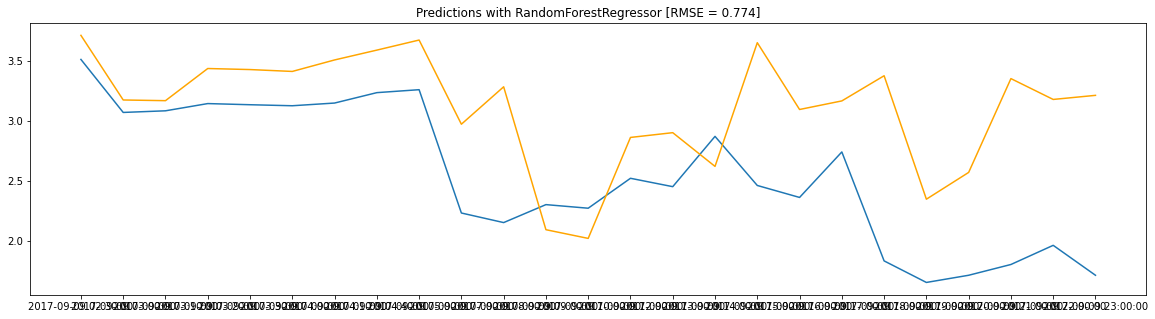

In [44]:
fig, ax = plt.subplots(figsize=(20,5))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_df['% Silica Concentrate'], predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test_df['dates'], test_df['% Silica Concentrate'])
pyplot.plot(predictions, color='orange')
plt.title("Predictions with RandomForestRegressor [RMSE = %.3f]" % rmse)
pyplot.show()